**Step 1:Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2: Load Required Libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Step 3: Load Dataset**

In [3]:
import pandas as pd

# Define the path to your dataset
file_path = "/content/drive/MyDrive/customer-churn-prediction/data/raw/E Commerce Dataset.xlsx"

# Load the dataset
xls = pd.ExcelFile(file_path)

# Check available sheet names
xls.sheet_names


['Data Dict', 'E Comm']

**Step 4: Load the Main Data Sheet**

In [4]:
# Load the main dataset sheet
df = pd.read_excel(xls, sheet_name="E Comm")

# Display basic info
df.info()

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


**Step 5: Handle Missing Values**

In [5]:
# Define numerical columns
num_cols = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear",
            "CouponUsed", "OrderCount", "DaySinceLastOrder"]

# Fill missing numerical values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Verify missing values are handled
print(df.isnull().sum())


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


**Step 6: Visualize Churn Distribution**

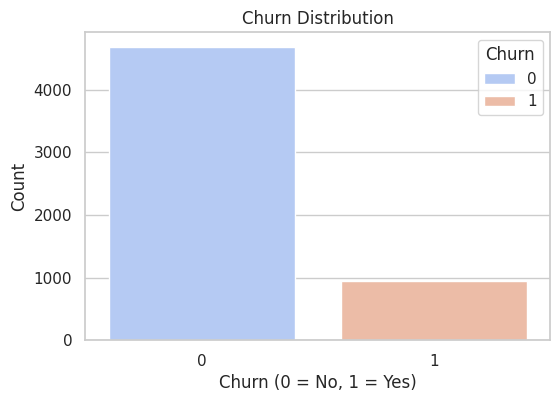

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Churn"], hue=df["Churn"], palette="coolwarm", dodge=False)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Churn', loc='upper right')
plt.show()


**Step 7: Correlation Heatmap**

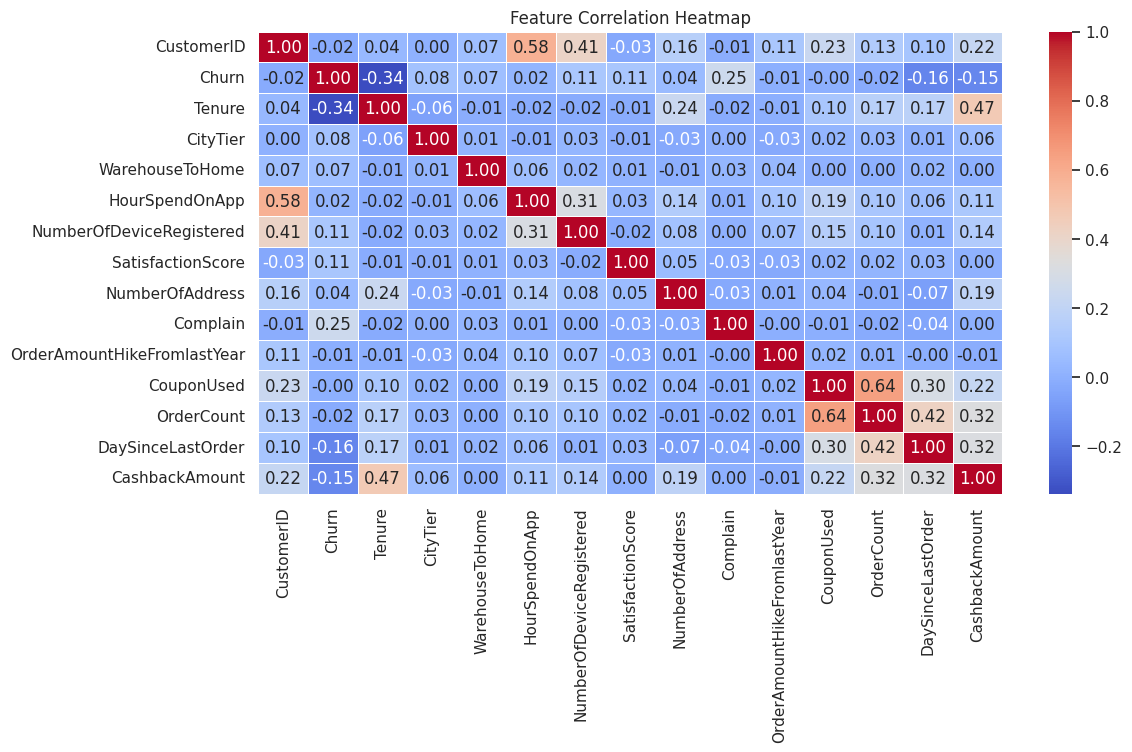

In [7]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**Step 8: Analyze Categorical Features**

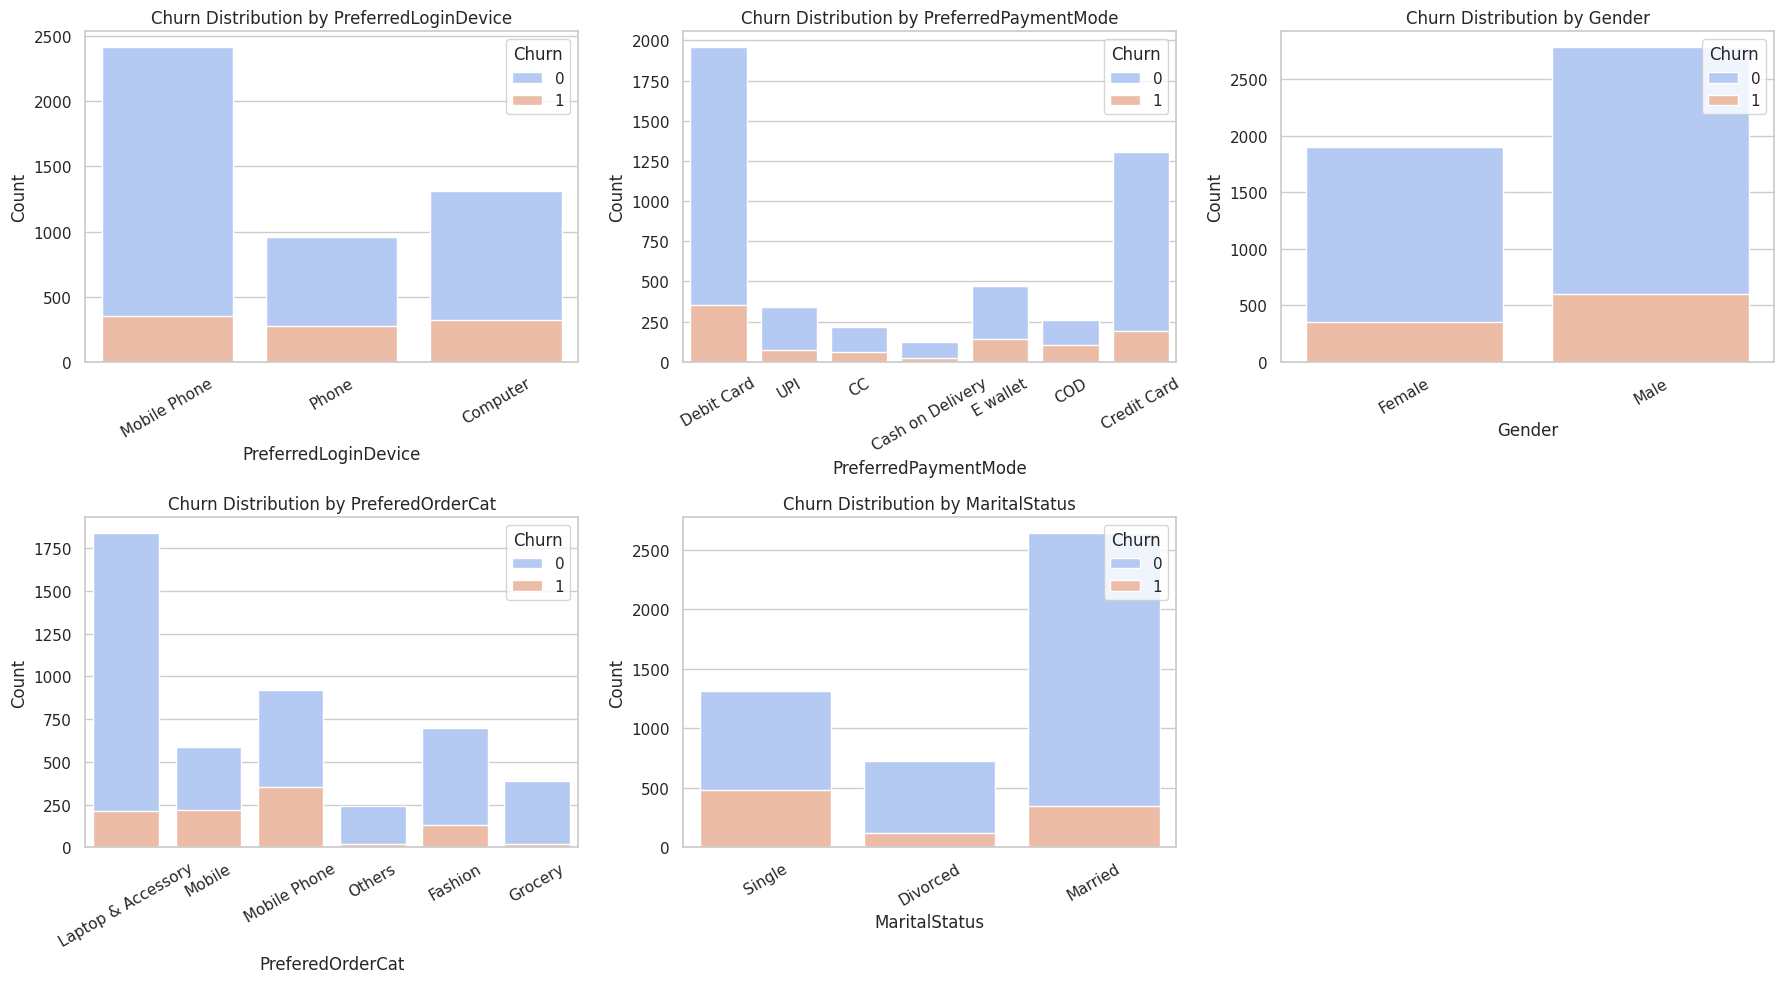

In [8]:
# Select categorical columns
cat_cols = ["PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus"]

# Plot distribution of categorical features vs. Churn
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], hue=df["Churn"], palette="coolwarm", dodge=False, ax=axes[i])
    axes[i].set_title(f"Churn Distribution by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend(title='Churn', loc='upper right')

# Remove the last empty subplot if the number of categorical columns is less than the number of subplots
if len(cat_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


# **Step 9: Outlier Detection and Treatment**

**9.1 Identify Outliers in Numerical Features**

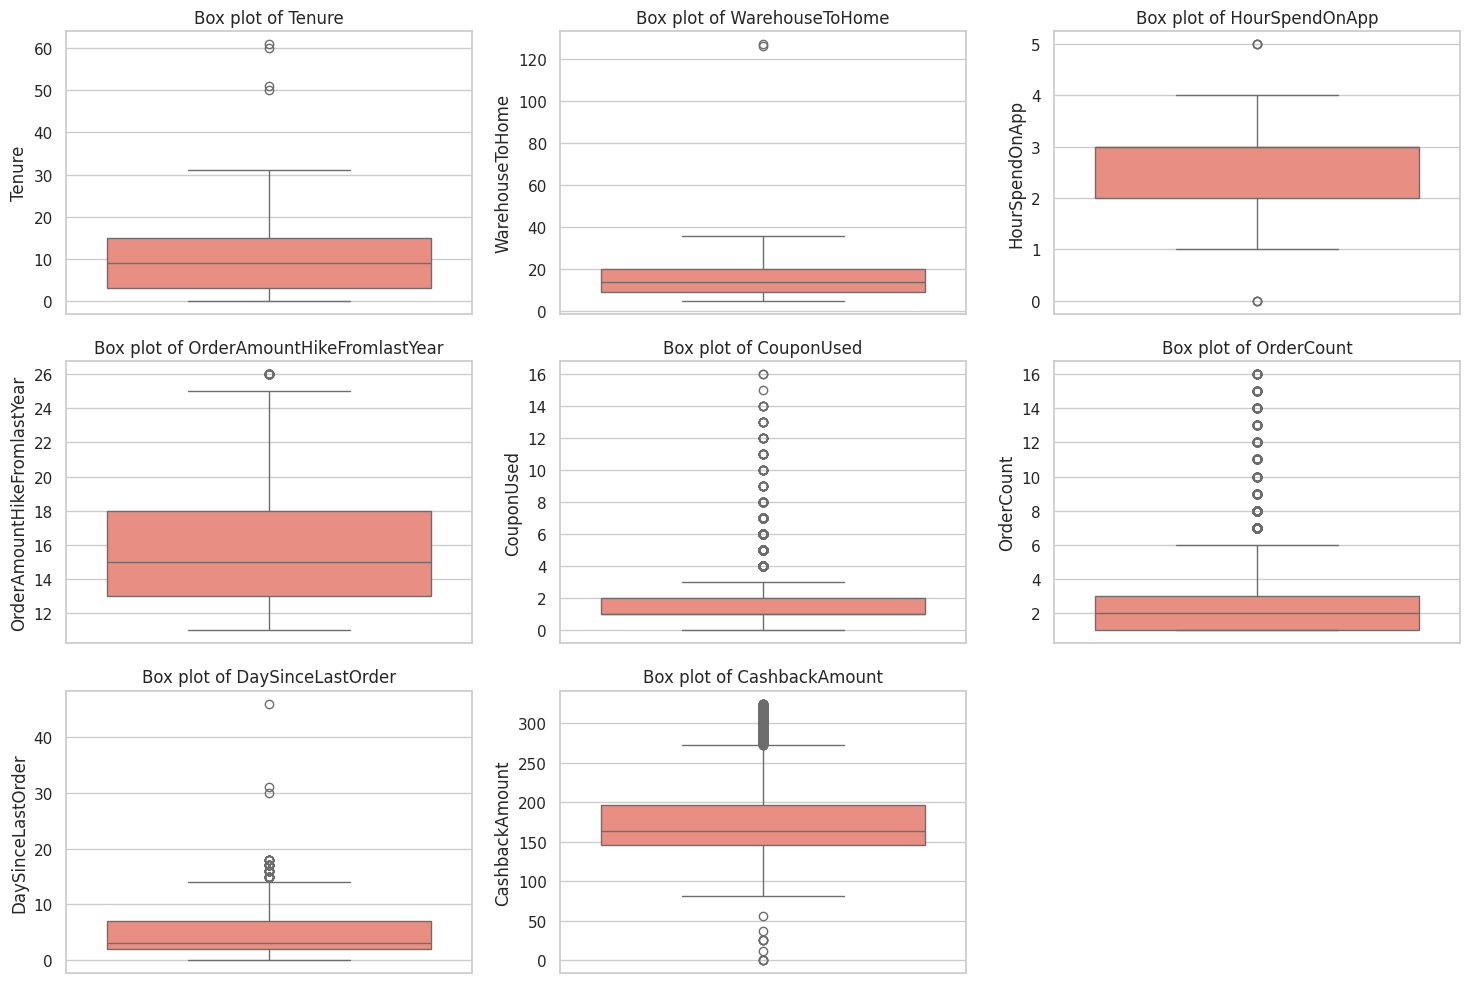

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
num_cols = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear",
            "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]

# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


**9.2 Handle Outliers**

In [10]:
# Example: Removing outliers beyond 1.5*IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |(df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


# **Step 10: Feature Engineering**

**10.1 Create New Features**

In [11]:
# Example: Customer's average order value
df['AvgOrderValue'] = df['CashbackAmount'] / df['OrderCount']

# Example: Customer's engagement score
df['EngagementScore'] = df['HourSpendOnApp'] / df['NumberOfDeviceRegistered']


<ipython-input-11-bdfb5ac00e86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AvgOrderValue'] = df['CashbackAmount'] / df['OrderCount']
<ipython-input-11-bdfb5ac00e86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EngagementScore'] = df['HourSpendOnApp'] / df['NumberOfDeviceRegistered']


**10.2 Encode Categorical Variables**

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encode other categorical variables
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)


# **Step 11: Data Normalization**

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[num_cols] = scaler.fit_transform(df[num_cols])


**Step 12: Create a processed directory and Save theCleaned Dataset**

In [14]:
import os
import pandas as pd

# Define the path to the processed directory
processed_dir = "/content/drive/MyDrive/customer-churn-prediction/data/processed"

# Create the directory if it doesn't exist
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)
    print(f"Directory '{processed_dir}' created successfully.")
else:
    print(f"Directory '{processed_dir}' already exists.")

# Define the path to save the processed dataset
processed_file_path = os.path.join(processed_dir, "cleaned_E_Commerce_Dataset.csv")

# Assuming 'df' is your cleaned DataFrame
df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved at '{processed_file_path}'.")


Directory '/content/drive/MyDrive/customer-churn-prediction/data/processed' already exists.
Processed dataset saved at '/content/drive/MyDrive/customer-churn-prediction/data/processed/cleaned_E_Commerce_Dataset.csv'.


# **Create A train test split and make and save it in processed directory**

In [15]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the processed directory path
processed_dir = "/content/drive/MyDrive/customer-churn-prediction/data/processed"

# Create the directory if it doesn't exist
os.makedirs(processed_dir, exist_ok=True)

# Load your cleaned dataset
cleaned_data_path = os.path.join(processed_dir, "/content/drive/MyDrive/customer-churn-prediction/data/processed/cleaned_E_Commerce_Dataset.csv")
df = pd.read_csv(cleaned_data_path)

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save train and test datasets in the processed folder
train_csv_path = os.path.join(processed_dir, "train.csv")
test_csv_path = os.path.join(processed_dir, "test.csv")

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Train dataset saved at: {train_csv_path}")
print(f"Test dataset saved at: {test_csv_path}")


Train dataset saved at: /content/drive/MyDrive/customer-churn-prediction/data/processed/train.csv
Test dataset saved at: /content/drive/MyDrive/customer-churn-prediction/data/processed/test.csv
